In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


In [2]:
#Veri setini oku
df = pd.read_excel('/content/drive/MyDrive/Veri-Seti.xlsx')
df.head()

,Date,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
0,2010-01-01,20095.0,37.0,13.1820,2.107385,341244.126
1,2010-02-01,31172.0,37.0,13.2725,2.073890,351940.949
2,2010-03-01,51769.0,37.0,12.7275,2.085522,361307.320
3,2010-04-01,54946.0,37.0,12.0120,2.009010,373575.340
4,2010-05-01,59377.0,37.0,11.7400,1.948870,387708.051


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            162 non-null    datetime64[ns]
 1   Otomotiv Satis  149 non-null    float64       
 2   OTV Orani       149 non-null    float64       
 3   Faiz            149 non-null    float64       
 4   EUR/TL          149 non-null    float64       
 5   Kredi Stok      149 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.7 KB


In [4]:
#Haziran verileri boş olduğu için onları veri setinden çıkar
df=df.dropna()

In [5]:
df.describe()

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
count,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,65902.617450,43.697987,16.034380,4.808703,1.787554e+06
std,26175.801077,5.846811,5.319518,3.321767,1.176366e+06
min,14373.000000,37.000000,9.607500,1.927305,3.412441e+05
25%,50008.000000,40.000000,12.715000,2.464018,7.755455e+05
50%,63044.000000,45.000000,14.485000,3.276861,1.474594e+06
75%,79819.000000,50.000000,17.475000,6.380609,2.447479e+06
max,156173.000000,65.000000,32.782500,16.560000,4.862887e+06


In [6]:
df=df.drop(['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            149 non-null    datetime64[ns]
 1   Otomotiv Satis  149 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [8]:
df

,Date,Otomotiv Satis
0,2010-01-01,20095.0
1,2010-02-01,31172.0
2,2010-03-01,51769.0
3,2010-04-01,54946.0
4,2010-05-01,59377.0
...,...,...
144,2022-01-01,38131.0
145,2022-02-01,49652.0
146,2022-03-01,64267.0
147,2022-04-01,60035.0


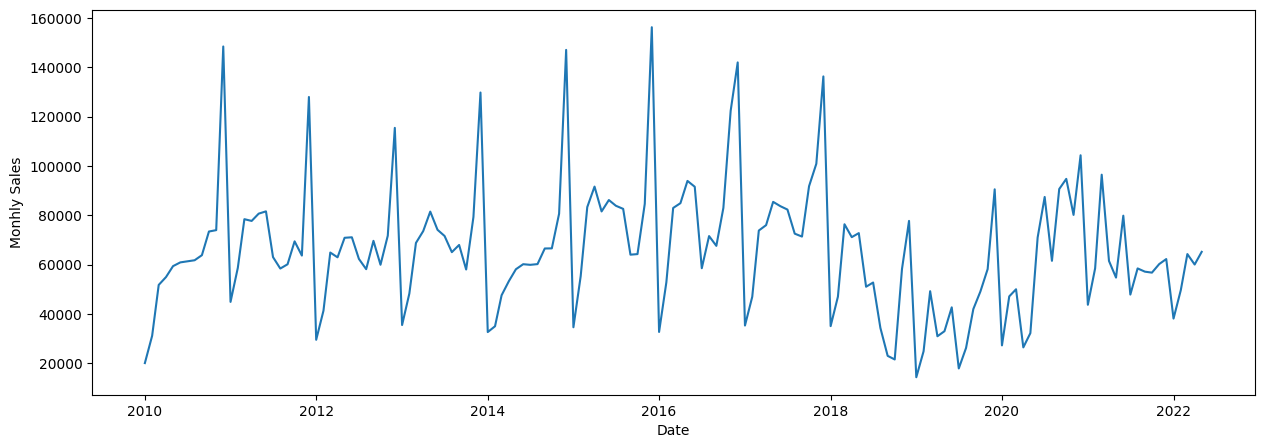

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Otomotiv Satis'])
plt.xlabel("Date")
plt.ylabel("Monhly Sales")
plt.show()

<Axes: >

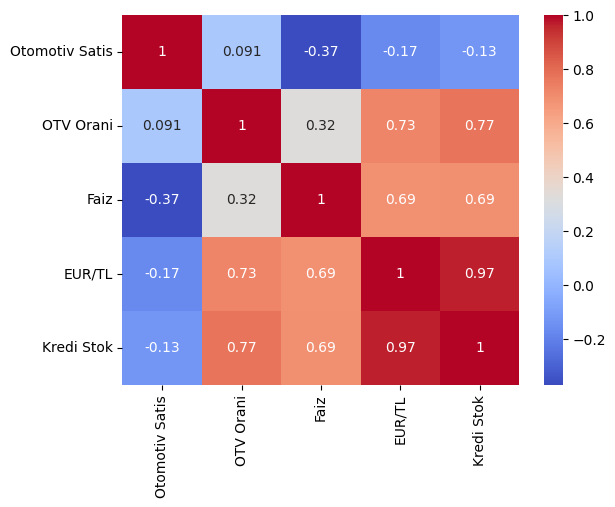

In [ ]:
# Bağımsız değişkenler arasındaki ilişkiyi incelemek için korelasyon matrisini göster
correlation_matrix = df.corr()

# Korelasyon matrisi ısı haritası olarak göster
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Bağımsız değişkenleri X değişkenine ata
X = df[['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok']]

# Bağımlı değişkeni y değişkenine ata
y = df['Otomotiv Satis'].reset_index(drop=True)

# Modeli sonrasında test etmek için eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Model nesnesi oluştur
model = LinearRegression()

# Modeli verilere uydur
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model doğrusunun kestiği nokta
model.intercept_

65411.140422538214

In [ ]:
# Doğrunun katsayıları
model.coef_

array([ 7.41947930e+02, -2.07429061e+03, -3.54395065e+03,  1.04561655e-02])

In [ ]:
# Regresyon katsayılarını ve sabitini değişkene ata
coefficients = model.coef_
intercept = model.intercept_

# Regresyon denklemi
equation = f"y = {intercept: .2f} + {coefficients[0]:.2f}xOTV + {coefficients[1]:.2f}xFaiz + {coefficients[2]:.2f}xEUR/TL + {coefficients[3]:.2f}xKredi Stok"
print(equation)

y =  65411.14 + 741.95xOTV + -2074.29xFaiz + -3543.95xEUR/TL + 0.01xKredi Stok


In [ ]:
gercek_y = y_test.reset_index(drop=True)

In [ ]:
tahmin_edilen_y=pd.DataFrame(model.predict(X_test))
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)
hatalar.columns=["gercek_satis","tahmin_edilen_satis"]
hatalar["tahmin_edilen_satis"]=hatalar["tahmin_edilen_satis"].round(0)
hatalar

,gercek_satis,tahmin_edilen_satis
0,58504.0,68694.0
1,24875.0,42463.0
2,146989.0,75286.0
3,67593.0,72341.0
4,61764.0,67800.0
5,23028.0,27459.0
6,57141.0,63284.0
7,136240.0,77360.0
8,58176.0,67726.0
9,35323.0,75334.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mse:{mse: .2f} , rmse: {rmse:.2f} , mape: {mape:.2f}")


mse: 838577315.52 , rmse: 28958.20 , mape: 0.37


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
#Veri setini oku

# Modelleri oluştur
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]

# Modelleri eğit ve mape skorlarını hesapla
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_percentage_error(y_test, y_pred)
    print(type(model).__name__, ' MAPE:', result)

LinearRegression  MAPE: 0.3667075438557169
Ridge  MAPE: 0.36676215456333144
Lasso  MAPE: 0.36671191391696534
ElasticNet  MAPE: 0.37052185444147584


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

X = df[['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok']]


y = df['Otomotiv Satis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X = X.values.reshape(-1, 2, 2, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(2, 2, 1)))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_absolute_percentage_error', optimizer='adam')


model.fit(X, y, epochs=10, batch_size=10)


Epoch 1/10
15/15 [==============================] - 3s 3ms/step - loss: 924.3867
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 724.3829
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 540.7922
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 368.7737
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 204.6170
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 74.5129
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 73.9463
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 61.7996
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 62.1647
Epoch 10/10
15/15 [==============================] - 0s 4ms/step - loss: 62.2947
